In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\portland-oregon-average-monthly-.csv')

In [3]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Month                                                                                       115 non-null    object
 1   Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [5]:
df.describe()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
count,115,115
unique,115,112
top,1967-03,1417
freq,1,2


In [6]:
df.columns = ['month', 'average_monthly_ridership']
df.head()

,month,average_monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [7]:
df.dtypes

month                        object
average_monthly_ridership    object
dtype: object

In [8]:
df.iloc[:, 1].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', ' n=114'], dtype=object)

In [9]:
df = df.drop(df.index[df['average_monthly_ridership'] == ' n=114'])

In [10]:
df.iloc[:, 1].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327'], dtype=object)

In [11]:
df.iloc[:, 1] = df.iloc[:, 1].astype(np.int32)

In [12]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y-%m')

In [13]:
df.dtypes

month                        datetime64[ns]
average_monthly_ridership             int32
dtype: object

# Time Series Analysis

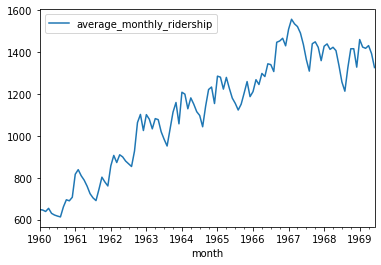

In [14]:
df.plot.line(x='month', y='average_monthly_ridership')

## Plotting monthly variation of dataset

In [15]:
to_plot_monthly_variation = df

In [16]:
mon =df['month']

In [18]:
temp = pd.DatetimeIndex(mon)

In [19]:
month = pd.Series(temp.month)

In [20]:
# dropping month from to_plot_monthly_variation
to_plot_monthly_variation = to_plot_monthly_variation.drop(['month'], axis = 1)

In [21]:
to_plot_monthly_variation = to_plot_monthly_variation.join(month)

In [22]:
to_plot_monthly_variation.head()

,average_monthly_ridership,month
0,648,1
1,646,2
2,639,3
3,654,4
4,630,5


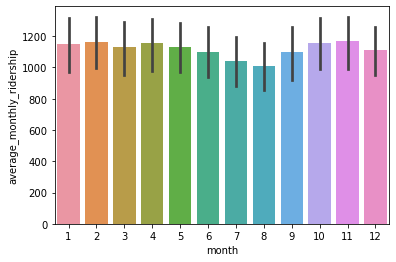

In [24]:
sns.barplot(x='month', y='average_monthly_ridership', data=to_plot_monthly_variation)
plt.show();

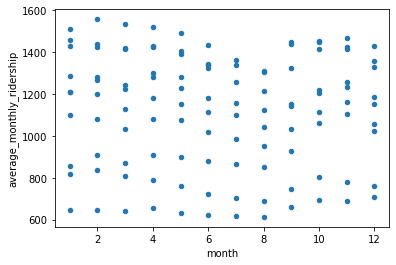

In [26]:
to_plot_monthly_variation.plot.scatter(x='month', y='average_monthly_ridership')
plt.show();

In [27]:
rider = df['average_monthly_ridership']

## Trend Analysis

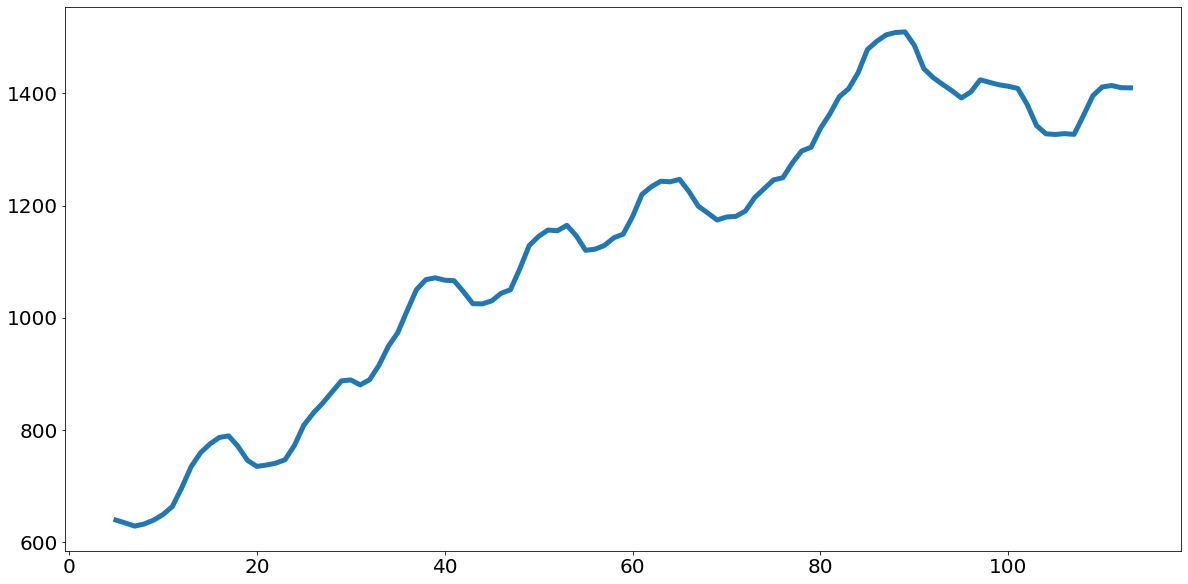

In [29]:
rider.rolling(6).mean().plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.show();

## Seasonability Analysis

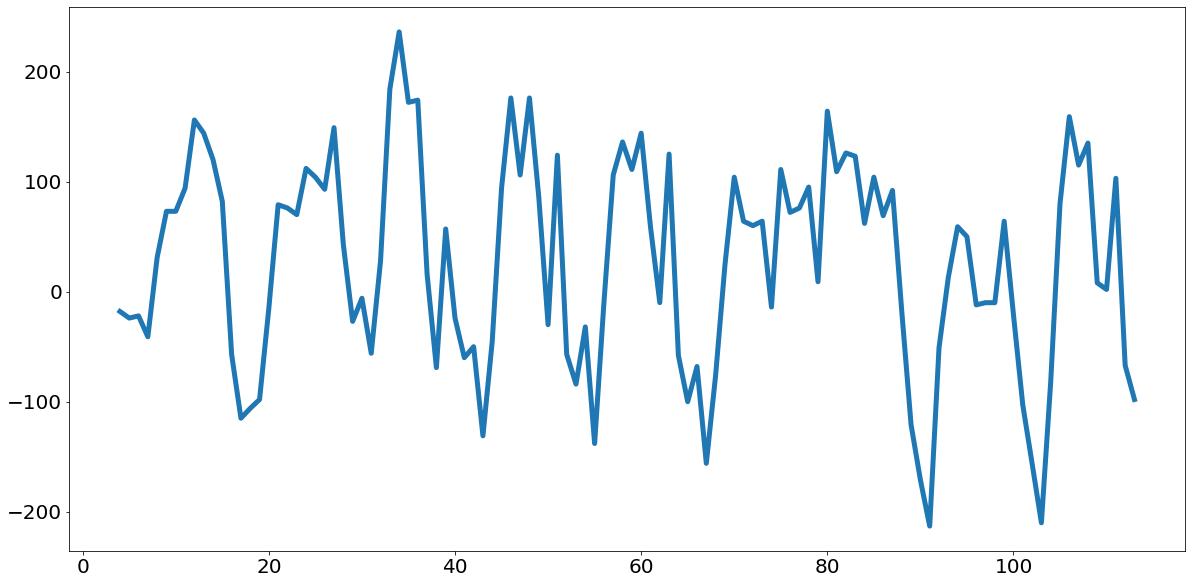

In [30]:
rider.diff(periods=4).plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.show();

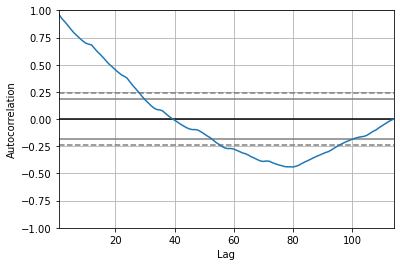

In [33]:
pd.plotting.autocorrelation_plot(df['average_monthly_ridership'])
plt.show()

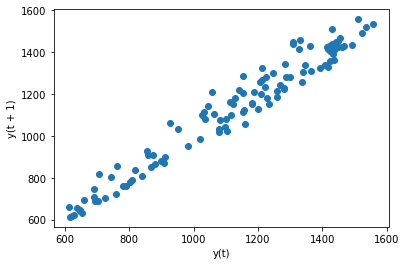

In [34]:
pd.plotting.lag_plot(df['average_monthly_ridership'])
plt.show();

In [35]:
df = df.set_index('month')

# ARIMA model

In [37]:
mod = sm.tsa.SARIMAX(df['average_monthly_ridership'], trend='n', order=(0, 1, 0), seasonal_order = (1, 1, 1, 12))
results = mod.fit()
print(results.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:            average_monthly_ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -501.340
Date:                              Sun, 21 Feb 2021   AIC                           1008.680
Time:                                      18:36:24   BIC                           1016.526
Sample:                                  01-01-1960   HQIC                          1011.856
                                       - 06-01-1969                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.99

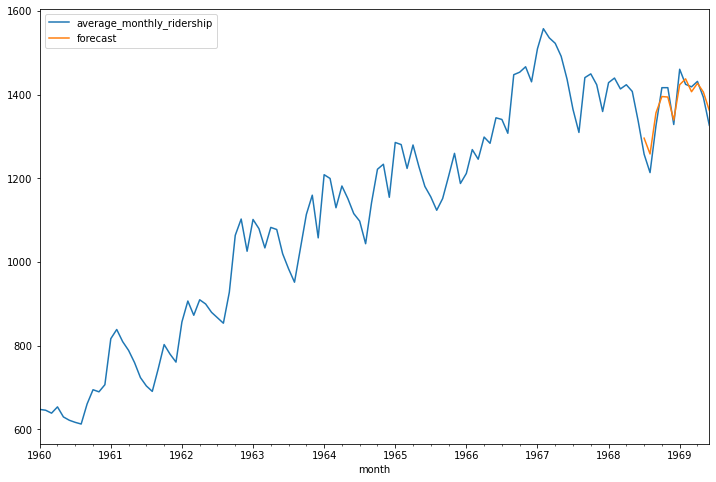

In [38]:
df['forecast'] = results.predict(start=102, end=120, dynamic=True)
df[['average_monthly_ridership', 'forecast']].plot(figsize=(12, 8))
plt.show();

# To generate future forecasts

In [39]:
def forecasting_future_months(df, no_of_months):
    df_predict = df.reset_index()
    mon = df_predict['month']
    mon = mon + pd.DateOffset(months = no_of_months)
    future_dates = mon[-no_of_months-1:]
    df_predict = df_predict.set_index('month')
    future = pd.DataFrame(index = future_dates, columns = df_predict.columns)
    df_predict = pd.concat([df_predict, future])
    df_predict['forecast'] = results.predict(start=114, end=125, dynamic=True)
    df_predict[['average_monthly_ridership', 'forecast']].iloc[-no_of_months-12:].plot(figsize=(12, 8))
    plt.show()
    return df_predict[-no_of_months:]

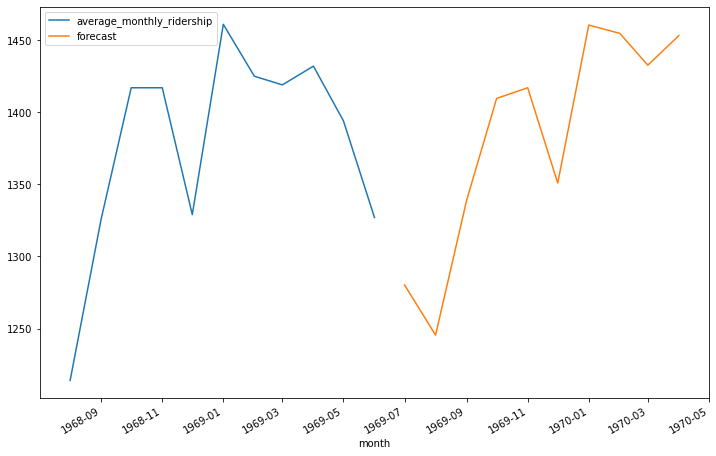

In [41]:
predicted = forecasting_future_months(df,10)

In [42]:
df.tail()

,average_monthly_ridership,forecast
month,,
1969-02-01,1425,1438.085589
1969-03-01,1419,1407.271247
1969-04-01,1432,1427.485034
1969-05-01,1394,1406.608129
1969-06-01,1327,1362.723648
